## Setup

In [ ]:
import gym

from time import sleep

In [ ]:
env = gym.make("Taxi-v2")

In [ ]:
n = env.observation_space.n
a = env.action_space.n

In [ ]:
q_table = np.zeros((n, a))

Hyperparameters

In [ ]:
n_episodes = 5000
n_episodes_test = 100
lr = 0.9
max_steps = 100
gamma = 0.9

In [ ]:
max_epsilon = 1
min_epsilon = 1e-2
decay_rate = 1e-3

## Train

In [7]:
rewards = []
epsilon = max_epsilon

In [8]:
explore = lambda eps: bool(np.random.binomial(1, eps)) if eps > 0.1 else False

In [ ]:
for episode in tqdm(range(n_episodes)):
    state = env.reset()
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        action = env.action_space.sample() if explore(epsilon) else q_table[state].argmax()

        next_state, reward, done, _ = env.step(action)
        
        # Bellman Equation
        expected_reward = reward + gamma * q_table[next_state].max()
        dq = expected_reward - q_table[state, action]
        q_table[state, action] += lr * dq
        
        total_rewards += reward
        state = next_state
        if done: break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

In [10]:
print(f'Score over time: {sum(rewards) / n_episodes:.2f}')
print(np.round(q_table, 2))
print(epsilon)

Score over time: -27.20
[[ 0.    0.    0.    0.    0.    0.  ]
 [ 1.62  2.91  1.62  2.91  4.35 -6.09]
 [ 4.35  5.94  4.35  5.94  7.71 -3.06]
 ...
 [ 7.38  9.68  6.45  5.94 -1.31 -1.31]
 [ 1.17 -3.1   1.2   2.91 -7.8  -7.86]
 [14.3  11.87 14.3  17.    5.3   5.3 ]]
0.01667724143301951


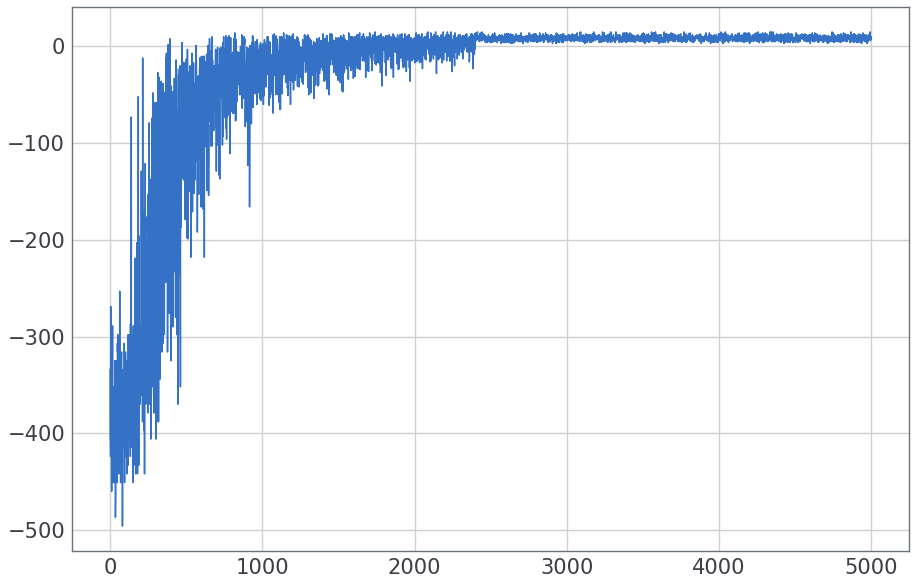

In [12]:
plot(rewards)

In [ ]:
test_rewards = []
for episode in tqdm(range(n_episodes_test)):
    state = env.reset()
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        action = q_table[state].argmax()
        
        state, reward, done, _ = env.step(action)
        
        total_rewards += reward
        if done: break

    test_rewards.append(total_rewards)

In [14]:
print(f'Score over time: {sum(test_rewards) / n_episodes_test:.2f}')

Score over time: 8.81


In [15]:
state = env.reset()
total_rewards = 0
for step in range(max_steps):
    env.render()
    action = q_table[state].argmax()
    state, r, done, _ = env.step(action)
    total_rewards += r
    if done: break
env.close()
print(total_rewards)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
12
